Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


No GPU was detected. CNNs can be very slow without a GPU.


In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [7]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb])
model.evaluate(X_test, y_test)

Epoch 1/100
1719/1719 [==============================] - 30s 17ms/step - loss: 0.1912 - accuracy: 0.9421 - val_loss: 0.0459 - val_accuracy: 0.9896
Epoch 2/100
1719/1719 [==============================] - 29s 17ms/step - loss: 0.0793 - accuracy: 0.9754 - val_loss: 0.0434 - val_accuracy: 0.9882
Epoch 3/100
1719/1719 [==============================] - 30s 18ms/step - loss: 0.0607 - accuracy: 0.9809 - val_loss: 0.0352 - val_accuracy: 0.9920
Epoch 4/100
1719/1719 [==============================] - 30s 17ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0306 - val_accuracy: 0.9926
Epoch 5/100
1719/1719 [==============================] - 29s 17ms/step - loss: 0.0421 - accuracy: 0.9863 - val_loss: 0.0368 - val_accuracy: 0.9904
Epoch 6/100
1719/1719 [==============================] - 30s 17ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0334 - val_accuracy: 0.9920
Epoch 7/100
1719/1719 [==============================] - 29s 17ms/step - loss: 0.0329 - accuracy: 0.9892 - val_loss: 0

[0.029467910528182983, 0.9919999837875366]

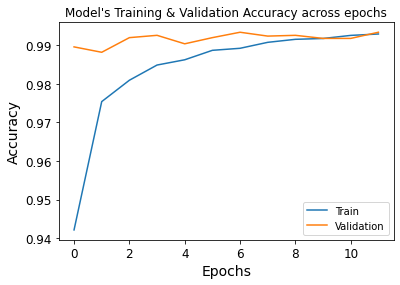

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()